<a href="https://colab.research.google.com/github/jpbarragan99/BioInf_Project1/blob/main/PDDpt4_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Models with Random Forest Algorithm**

## **Importing the libraries and Loading the data set**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [35]:
#! wget https://github.com/jpbarragan99/BioInf_Project1/data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-10-05 18:41:55--  https://github.com/jpbarragan99/BioInf_Project1/data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-10-05 18:41:55 ERROR 404: Not Found.



In [19]:
df = pd.read_csv('06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.909742
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.292685
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.187087
1174,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.987163
1175,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
1176,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.508638


## **Input Features**

The *NS3* data set contains 881 input features and 1 output variable (pIC50 values).

In [20]:
X = df.drop('pIC50', axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1174,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1175,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1176,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Output freatures**

In [21]:
Y = df.pIC50
Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1173    5.187087
1174    4.987163
1175    5.795880
1176    5.508638
1177    5.036212
Name: pIC50, Length: 1178, dtype: float64

### **Examine the data dimension**

In [22]:
X.shape

(1178, 881)

In [23]:
Y.shape

(1178,)

### **Removing low variance features**

In [24]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [25]:
X.shape

(1178, 164)

## **Data split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape, Y_train.shape

((942, 164), (942,))

In [28]:
X_test.shape, Y_test.shape

((236, 164), (236,))

## **Building the Regression Model using Random Forest**

In [29]:
model = RandomForestRegressor(n_estimators = 100)
model.fit (X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.17329978601424667

In [30]:
Y_pred = model.predict(X_test)

## **Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

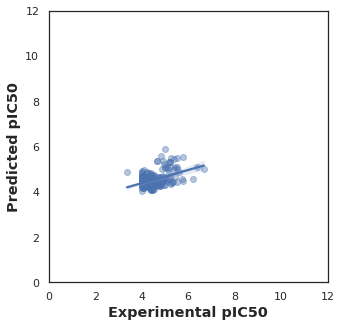

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set (color_codes = True)
sns.set_style ("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws = {'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show